<AxesSubplot:>

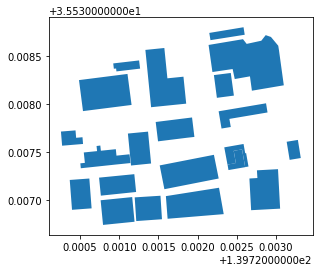

In [1]:
import pandas as pd
import geopandas as gpd
import pybdshadow

# Read building data
buildings = gpd.read_file(r'../example/data/bd_demo.json')
buildings = pybdshadow.bd_preprocess(buildings)
buildings = buildings[(buildings['x'] > 139.720311) &
                      (buildings['x'] < 139.723311) &
                      (buildings['y'] > 35.532816) &
                      (buildings['y'] < 35.540816)]
buildings.plot()

# Shadow calculation

In [2]:
#Given UTC time
date = pd.to_datetime('2022-01-01 12:45:33.959797119')\
    .tz_localize('Asia/Tokyo')\
    .tz_convert('UTC')

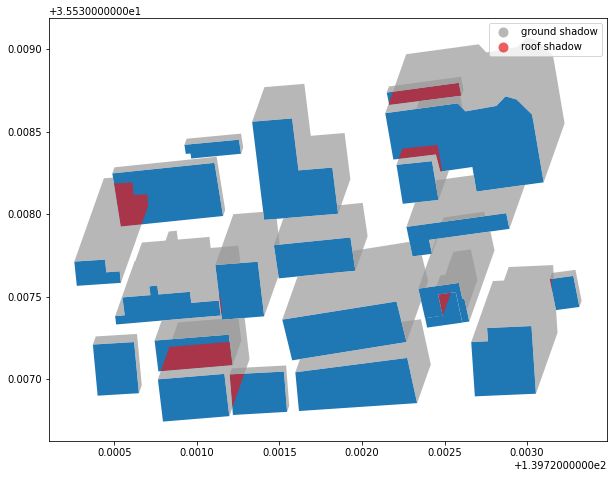

In [3]:

# Calculate shadows
import matplotlib.pyplot as plt
shadows = pybdshadow.bdshadow_sunlight(
    buildings, date, roof=True, include_building=False)
shadows['type'] += ' shadow'

# Visualize buildings and shadows using matplotlib
fig = plt.figure(1, (10, 10))
ax = plt.subplot(111)


# plot buildings
buildings.plot(ax=ax)

# plot shadows
shadows.plot(ax=ax, alpha=0.7,
             column='type',
             categorical=True,
             cmap='Set1_r',
             legend=True)

plt.show()

# Shadow coverage analysis

In [4]:
#Given date
day = '2022-01-01'
#Generate shadow every 1800 s
shadows = pybdshadow.cal_sunshadows(buildings,dates = [day],gap=1800)

## Roof

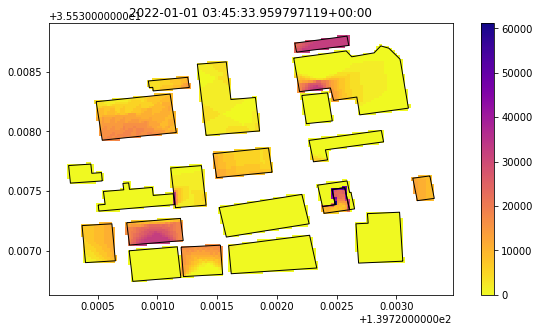

In [5]:
#Grid analysis of shadow cover duration(roof).
bdgrids = pybdshadow.cal_shadowcoverage(shadows,buildings,gap = 1800,accuracy=2)

#Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)

#Roof shadows
bdgrids.plot(ax = ax,cmap = 'plasma_r',column = 'time',alpha = 1,legend = True)

#buildings
buildings.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))

plt.title(date)
plt.show()

## Ground

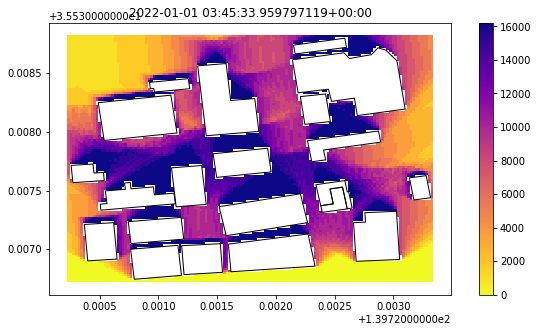

In [6]:
#Grid analysis of shadow cover duration(ground).
bdgrids = pybdshadow.cal_shadowcoverage(shadows,buildings,roof=False,gap = 900,accuracy=2)

#Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)

#Roof shadows
bdgrids.plot(ax = ax,cmap = 'plasma_r',column = 'time',alpha = 1,legend = True)

#buildings
buildings.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))

plt.title(date)
plt.show()